In [1]:
!pip install torchvision

In [2]:
import os

def show_tree(path,indent=0):
    for item in os.listdir(path):
        item_path=os.path.join(path,item)
        print(" " * indent + "├── " + item)
        if os.path.isdir(item_path):
            show_tree(item_path, indent + 4)

show_tree("/Users/mrinalseth13331/Downloads/archive")

├── transistor
    ├── test
        ├── damaged_case
            ├── 002.png
            ├── 003.png
            ├── 001.png
            ├── 000.png
            ├── 004.png
            ├── 005.png
            ├── 007.png
            ├── 006.png
            ├── 008.png
            ├── 009.png
        ├── misplaced
            ├── 002.png
            ├── 003.png
            ├── 001.png
            ├── 000.png
            ├── 004.png
            ├── 005.png
            ├── 007.png
            ├── 006.png
            ├── 008.png
            ├── 009.png
        ├── bent_lead
            ├── 002.png
            ├── 003.png
            ├── 001.png
            ├── 000.png
            ├── 004.png
            ├── 005.png
            ├── 007.png
            ├── 006.png
            ├── 008.png
            ├── 009.png
        ├── cut_lead
            ├── 002.png
            ├── 003.png
            ├── 001.png
            ├── 000.png
            ├── 004.png
            ├── 005.png
            ├── 00

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
data_counts = {}

dataset_path="/Users/mrinalseth13331/Downloads/archive"
for root, dirs, files in os.walk(dataset_path):
    # only count image files (jpg/png)
    count = len([f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
    if count > 0:
        folder_name = os.path.basename(root)
        data_counts[folder_name] = count

df = pd.DataFrame(list(data_counts.items()), columns=['Folder', 'Sample_Count'])
print(df)


                  Folder  Sample_Count
0           damaged_case            10
1              misplaced            10
2              bent_lead            10
3               cut_lead            10
4                   good           264
5                  color            19
6                 liquid            10
7                scratch            24
8               combined            11
9                   hole            17
10                 crack            18
11                  poke            18
12        faulty_imprint            19
13               squeeze            20
14                  flip            23
15                  bent            12
16             pill_type             9
17         contamination            21
18          broken_teeth            19
19           split_teeth            18
20                 rough            15
21       fabric_interior            16
22        squeezed_teeth            16
23         fabric_border            17
24           gray_stroke 

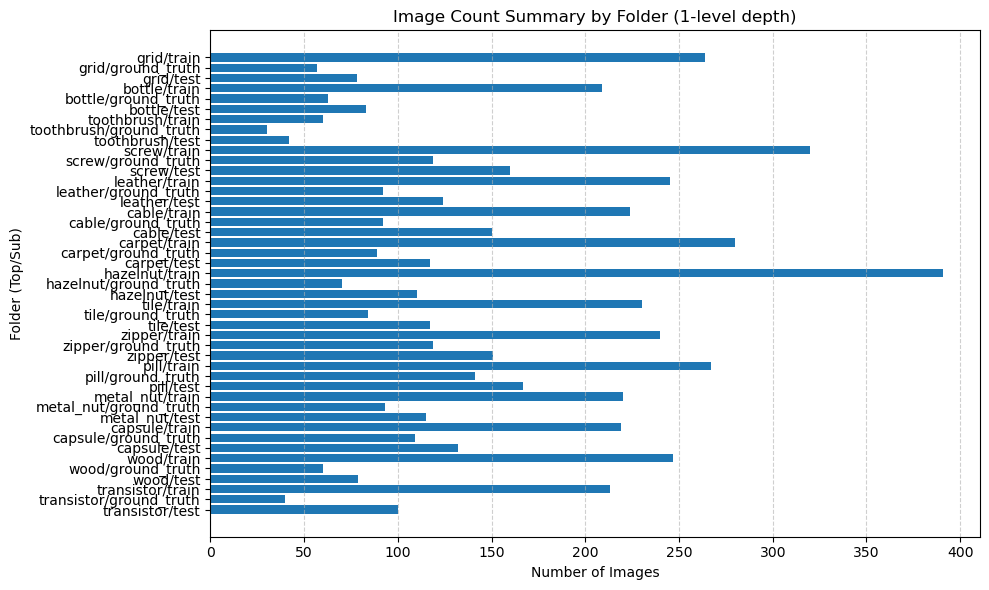

In [4]:
import os
import matplotlib.pyplot as plt

base_path = "/Users/mrinalseth13331/Downloads/archive"  

# valid image extensions
image_exts = {'.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff'}

def count_images_in_folder(folder_path):
    """Count images recursively inside a folder"""
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            ext = os.path.splitext(file)[1].lower()
            if ext in image_exts:
                count += 1
    return count

# get all first-level categories like 'wood', 'transistor', etc.
top_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

summary = {}

for top in top_folders:
    top_path = os.path.join(base_path, top)
    # get only the immediate subfolders (like test, train, ground_truth)
    subfolders = [sf for sf in os.listdir(top_path) if os.path.isdir(os.path.join(top_path, sf))]

    for sub in subfolders:
        sub_path = os.path.join(top_path, sub)
        image_count = count_images_in_folder(sub_path)
        summary[f"{top}/{sub}"] = image_count

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(list(summary.keys()), list(summary.values()))
plt.xlabel("Number of Images")
plt.ylabel("Folder (Top/Sub)")
plt.title("Image Count Summary by Folder (1-level depth)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Visualize some samples

In [5]:
from PIL import Image

image_path = "/Users/mrinalseth13331/Downloads/archive/carpet/train/good/279.png"
image = Image.open(image_path)
print(image.size)

(1024, 1024)


A tensor is the fundamental data structure used in TensorFlow. It is a multi-dimensional array designed 
to hold data of various types, such as integers, floats, or strings.

In [6]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

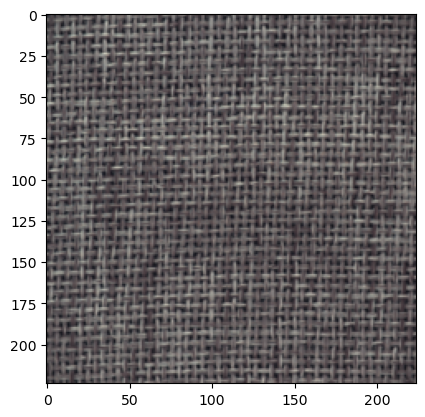

In [7]:
from torchvision.transforms import transforms 
 #now we defining the transformation pipeline using the torchivision.trsnformation to resize it tot he 224 x 224 pixels and later converting 
 #it to the tensor as the tensorflow accept the tensors 
transform = transforms.Compose([ 
     transforms.Resize((224, 224)), # Use 'transforms' 
     transforms.ToTensor() 
] 
) 
#Since image is the PIL image so we would now convert it 
image=transform(image)

#plot the transformed image
plt.imshow(image.permute(1,2,0)) #as when they r formed in the tensor channel came first then height * width
plt.show

Image Folder is the pytorch dataset class for loading images from a directory
it automatically laods the images from the subdirectories and applies transformation to them 
here we would be using the transform for each image for the exampl in the bootle train subfolder

In [8]:
from torchvision.datasets import ImageFolder

#define the path to the directory folder
train_image_path='archive/bottle/train'

good_dataset=ImageFolder(root=train_image_path,transform=transform)

# access the sample from the dataset
# in this case, we're accesing the first sample
# x contains the preprocessed image data
# y contains the coreesponding label (label the data as per the folder)
X,Y=good_dataset[0]
print('X.shape: ',X.shape)


X.shape:  torch.Size([3, 224, 224])


## Train - Test split for the autoencoder (As A Example)

In [9]:
import torch 

train_dataset,test_dataset=torch.utils.data.random_split(good_dataset,[0.8,0.2])

print("total number of samples in the bottle train ",len(good_dataset))
print("no. of sample in the train",len(train_dataset))
print("no. of sample in the test",len(test_dataset))

total number of samples in the bottle train  209
no. of sample in the train 168
no. of sample in the test 41


# Using dataloader for efficient data loading during training

In [10]:
import torch 
from torch.utils.data import DataLoader

BS=16

train_loader=DataLoader(train_dataset, batch_size=BS,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=BS,shuffle=False)
#get the batch of the label and the images from the trainnig loader
image_batch,label_batch=next(iter(train_loader))

print(f'shape of the imput images : {image_batch.shape}')
print(f'shape of the labels: {label_batch.shape}')

memory_usage=image_batch.numel()*image_batch.element_size()

print(f"memory usage of the tensor: {memory_usage//1024} KB")


shape of the imput images : torch.Size([16, 3, 224, 224])
shape of the labels: torch.Size([16])
memory usage of the tensor: 9408 KB


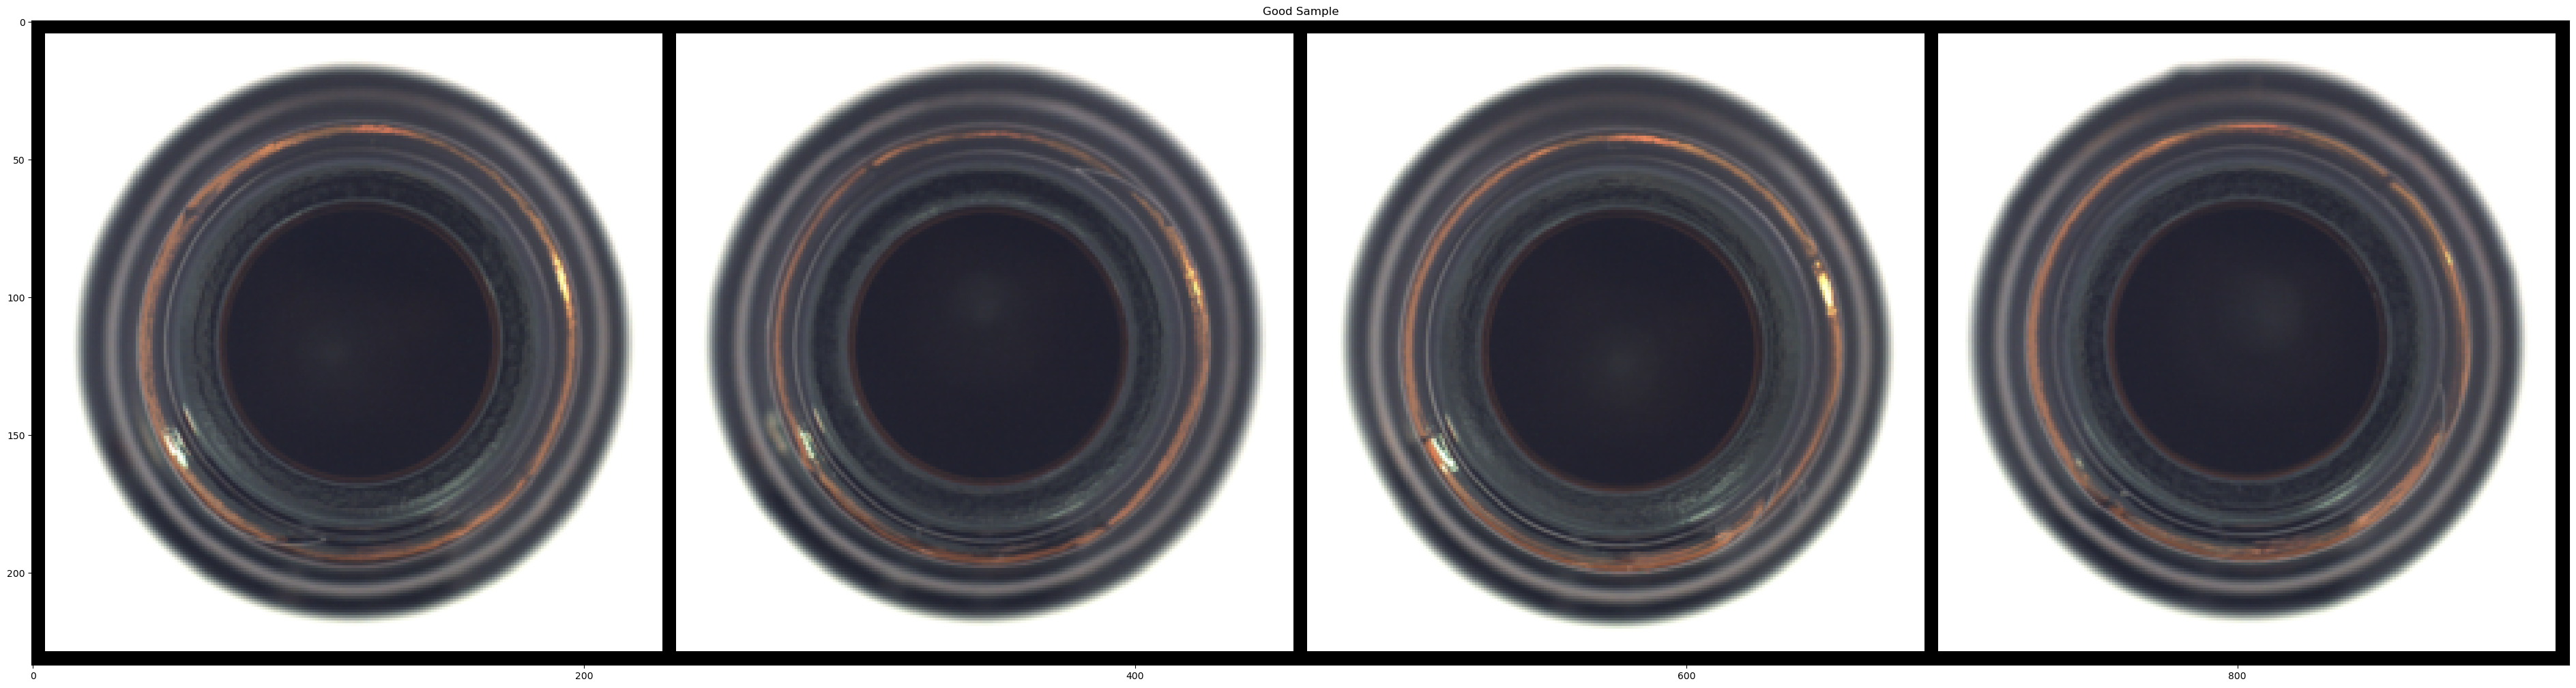

In [11]:
import torchvision

plt.figure(figsize=(12*4,48*4))
#permute because the pytorch have the shape {C,H,W} but the plt requires the shape {H,W,C}
grid=torchvision.utils.make_grid(image_batch[0:4],padding=5,nrow=4)
plt.imshow(grid.permute(1,2,0))
plt.title('Good Sample')
plt.show()

# TRAIN autoencoder model

In [12]:
import torch.nn.functional as F
from torch import nn

input_image=Image.open("/Users/mrinalseth13331/Downloads/archive/bottle/train/good/208.png")
input_image=transform(input_image) #resize the image and convert it to the tensor
print(input_image.shape)
# plt.imshow(input_image.permute(1,2,0))
# plt.show()

input_image = input_image.unsqueeze(0) #adds an extra dimension (representing batch size)
print(input_image.shape)

c1 = nn.Conv2d(in_channels=3,out_channels=128,kernel_size=4)
x=c1(input_image)
print(x.shape)

ap1=nn.AvgPool2d(kernel_size=2,stride=2)
x=ap1(x)
print(x.shape)
c2=nn.Conv2d(in_channels=128,out_channels=256,kernel_size=4)
ap2=nn.AvgPool2d(kernel_size=2,stride=2)
x=ap2(c2(x))
print(x.shape)

c3=nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3)
ap3=nn.AvgPool2d(kernel_size=2,stride=2)
x=ap3(c3(x))

print(x.shape)

c4=nn.ConvTranspose2d(in_channels=256,out_channels=256,kernel_size=4,stride=2,output_padding=1)
x=c4(x)
print(x.shape)
c5=nn.ConvTranspose2d(in_channels=256,out_channels=128,kernel_size=5,stride=2,output_padding=1)
x=c5(x)
print(x.shape)
c6=nn.ConvTranspose2d(in_channels=128,out_channels=3,kernel_size=5,stride=2,output_padding=1)
x=c6(x)
print(x.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 128, 221, 221])
torch.Size([1, 128, 110, 110])
torch.Size([1, 256, 53, 53])
torch.Size([1, 256, 25, 25])
torch.Size([1, 256, 53, 53])
torch.Size([1, 128, 110, 110])
torch.Size([1, 3, 224, 224])


In [13]:
import torch
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder=nn.Sequential(
            nn.Conv2d(3,128,kernel_size=4),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(128,256,kernel_size=4),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2),
            nn.Conv2d(256,256,kernel_size=3),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2,stride=2)
        )
        self.decoder=nn.Sequential(
            nn.ConvTranspose2d(256,256,kernel_size=4,stride=2,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256,128,kernel_size=5,stride=2,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128,3,kernel_size=5,stride=2,output_padding=1),
            nn.Sigmoid()
        )

    def forward(self,x):
        x=self.encoder(x)
        x=self.decoder(x)
        return x


# Test the autoencoder architecture with the sample random input image
model=Autoencoder()
input_image=torch.randn(1,3,224,224)
output_image=model(input_image)
print(output_image.shape)

torch.Size([1, 3, 224, 224])


In [15]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


  2%|▉                                           | 1/50 [00:10<08:38, 10.59s/it]

Epoch [1/50]  Train Loss: 0.0027  Val Loss: 0.0028


 12%|█████▎                                      | 6/50 [01:03<07:40, 10.47s/it]

Epoch [6/50]  Train Loss: 0.0026  Val Loss: 0.0026


 22%|█████████▍                                 | 11/50 [01:55<06:51, 10.55s/it]

Epoch [11/50]  Train Loss: 0.0025  Val Loss: 0.0025


 32%|█████████████▊                             | 16/50 [02:48<06:00, 10.60s/it]

Epoch [16/50]  Train Loss: 0.0024  Val Loss: 0.0024


 42%|██████████████████                         | 21/50 [03:45<05:27, 11.30s/it]

Epoch [21/50]  Train Loss: 0.0024  Val Loss: 0.0025


 52%|██████████████████████▎                    | 26/50 [04:45<04:46, 11.93s/it]

Epoch [26/50]  Train Loss: 0.0023  Val Loss: 0.0023


 62%|██████████████████████████▋                | 31/50 [05:49<04:04, 12.87s/it]

Epoch [31/50]  Train Loss: 0.0023  Val Loss: 0.0022


 72%|██████████████████████████████▉            | 36/50 [06:55<03:05, 13.24s/it]

Epoch [36/50]  Train Loss: 0.0022  Val Loss: 0.0022


 82%|███████████████████████████████████▎       | 41/50 [07:57<01:51, 12.41s/it]

Epoch [41/50]  Train Loss: 0.0022  Val Loss: 0.0021


 92%|███████████████████████████████████████▌   | 46/50 [08:57<00:47, 11.95s/it]

Epoch [46/50]  Train Loss: 0.0021  Val Loss: 0.0021


100%|███████████████████████████████████████████| 50/50 [09:44<00:00, 11.69s/it]


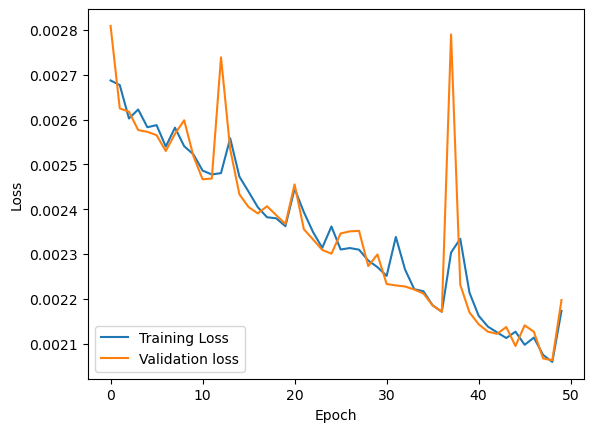

In [17]:
import torch
from tqdm import tqdm

Loss = []              # to store training loss
Validation_Loss = []   # to store validation loss

# Pick device: MPS (Apple GPU) > CUDA > CPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model.to(device)

num_epochs = 50

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0

    for img, _ in train_loader:
        img = img.to(device)

        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad() # this is to clear the gradients of all optimized tensors . This step is necessary because gradients are accumulated by the default in the pytorch
        loss.backward() # this compute the gradient of the loss function with respect to the model parameters. These gradient are 
        optimizer.step()# this update the model parameter using the computed gradients

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    Loss.append(epoch_loss)

    model.eval()
    with torch.no_grad():
        val_loss_sum = 0.0
        num_batches = 0

        for img, _ in test_loader:
            img = img.to(device)

            output = model(img)
            val_loss = criterion(output, img)

            val_loss_sum += val_loss.item()
            num_batches += 1

        val_loss_avg = val_loss_sum / num_batches
        Validation_Loss.append(val_loss_avg)
    if epoch%5==0:
        print(f"Epoch [{epoch+1}/{num_epochs}]  Train Loss: {epoch_loss:.4f}  Val Loss: {val_loss_avg:.4f}")

plt.plot(Loss,label='Training Loss')
plt.plot(Validation_Loss,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
 #save the model
torch.save(model.state_dict(),'bottle_model_weighs.pth')
model.eval()


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(2, 2), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(128, 3, kernel_size=(5, 5), stride=(2, 2), output_padding=(1, 1))
    (5): Sigmoid()
  )
)

### LOAD THE MODEL

In [ ]:
ckpoints = torch.load('bottle_model_weighs.pth')
model.load_state_dict(ckpoints)

torch.Size([16, 224, 224])


<Figure size 1600x1200 with 0 Axes>

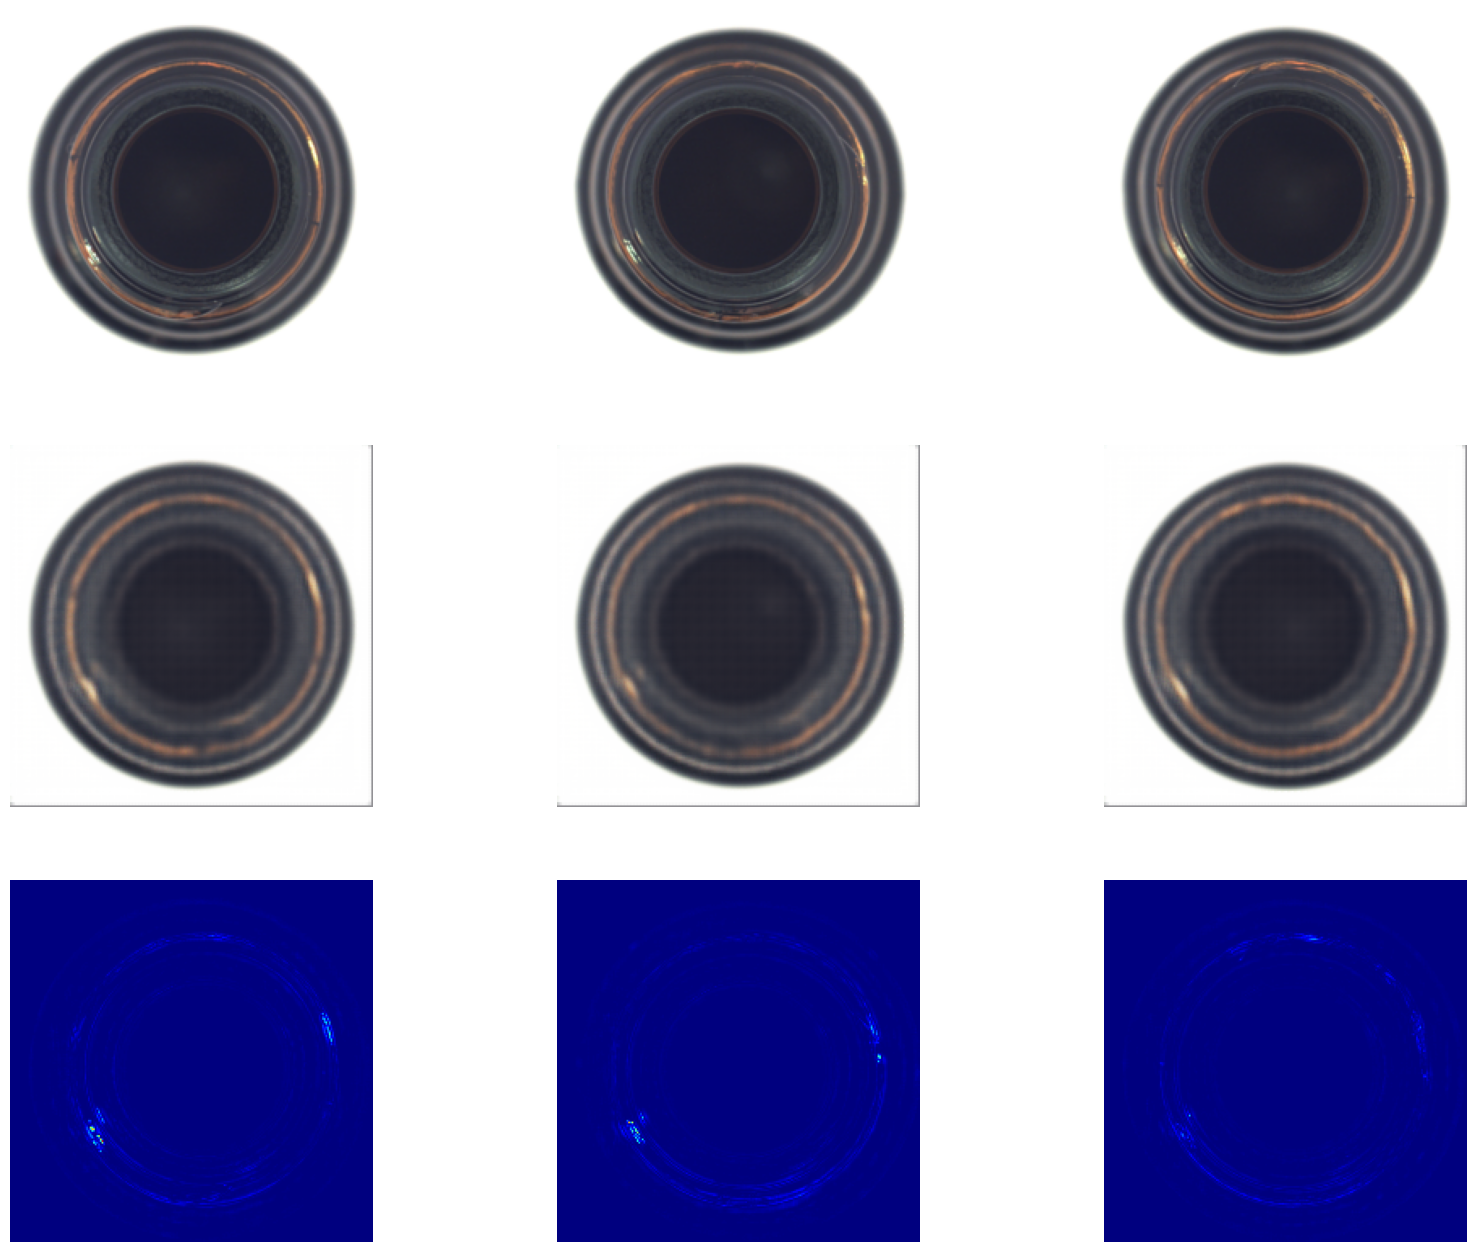

In [21]:
# get one batch
for data, _ in train_loader:
    data = data.to(device)
    with torch.no_grad():
        recon = model(data)
    break
recon_error =  ((data-recon)**2).mean(axis=1)
print(recon_error.shape)

plt.figure(dpi=250)
fig, ax = plt.subplots(3, 3, figsize=(5*4, 4*4))
for i in range(3):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[2, i].imshow(recon_error[i][0:-10,0:-10].cpu().numpy(), cmap='jet',vmax= torch.max(recon_error[i])) #[0:-10,0:-10]
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
    ax[2, i].axis('OFF')
plt.show()

## fault detection accuracy

In [28]:
RECON_ERROR=[]
with torch.no_grad():
    for data, _ in train_loader:
        data = data.to(device)

        recon = model(data)

        # per-pixel reconstruction error: (N, H, W)
        err_map = ((data - recon) ** 2).mean(dim=1)

        # optionally crop 10 pixels
        err_map = err_map[:, :-10, :-10]

        # compute mean error per image → shape (N,)
        err = err_map.mean(dim=(1, 2))

        RECON_ERROR.append(err)

# convert to numpy
RECON_ERROR = torch.cat(RECON_ERROR).cpu().numpy()

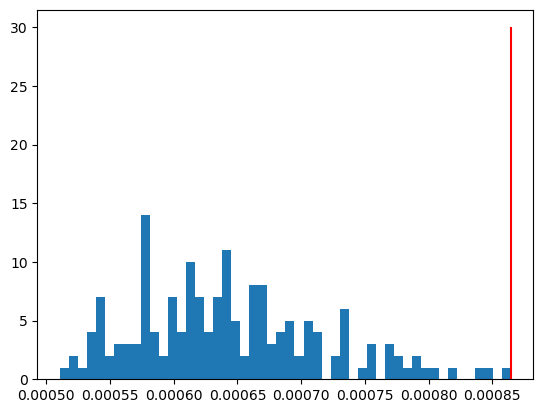

In [30]:
import numpy as np
best_threshold = np.mean(RECON_ERROR) + 3 * np.std(RECON_ERROR)

plt.hist(RECON_ERROR,bins=50)
plt.vlines(x=best_threshold,ymin=0,ymax=30,color='r') 
plt.show()

In [41]:
import os
import numpy as np
from PIL import Image
import torch

y_true = []
y_pred = []
y_score = []

test_root = "/Users/mrinalseth13331/Downloads/archive/bottle/test"

model.eval()
with torch.no_grad():

    # Loop through subfolders inside test/
    for fault_type in os.listdir(test_root):
        folder_path = os.path.join(test_root, fault_type)

        # Skip if not a folder
        if not os.path.isdir(folder_path):
            continue

        # Loop through images inside the folder
        for filename in os.listdir(folder_path):
            if not filename.endswith(".png"):
                continue

            img_path = os.path.join(folder_path, filename)

            # Load + transform
            img = Image.open(img_path)
            test_image = transform(img).unsqueeze(0).to(device)

            # Reconstruction
            recon_image = model(test_image)

            # Reconstruction error map
            err_map = ((test_image - recon_image) ** 2).mean(dim=1)
            err_map = err_map[:, :-10, :-10]   # optional crop

            # Scalar score
            y_score_image = err_map.mean().item()

            # Prediction
            y_pred_image = int(y_score_image >= best_threshold)

            # True label
            y_true_image = 0 if fault_type == "good" else 1

            # Append results
            y_true.append(y_true_image)
            y_pred.append(y_pred_image)
            y_score.append(y_score_image)

# Convert to numpy
y_true  = np.array(y_true)
y_pred  = np.array(y_pred)
y_score = np.array(y_score)


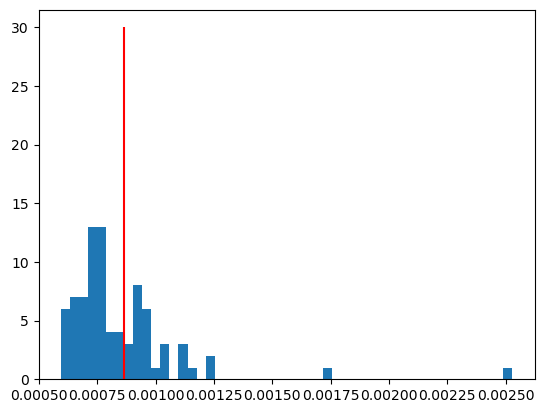

In [42]:
plt.hist(y_score,bins=50)
plt.vlines(x=best_threshold,ymin=0,ymax=30,color='r')
plt.show()

AUC-ROC Score: 0.7666666666666666


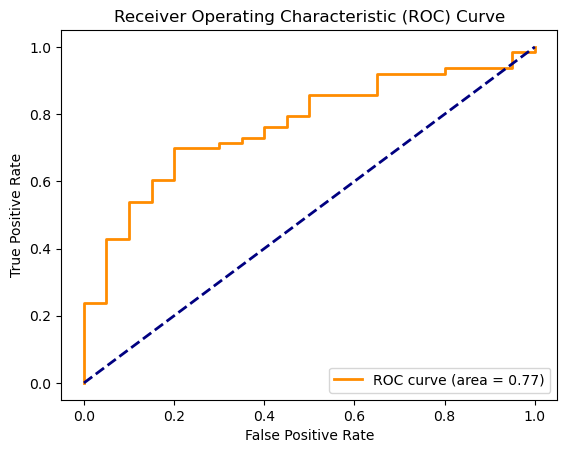

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns



# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_true, y_score)
print("AUC-ROC Score:", auc_roc_score)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()